# Установка библиотек и их зависимостей

Установка зависимостей используемых модулей.

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !pip install -q numpy>=1.18.5
    !pip install -q pandas>=1.0.5
    !pip install -q seaborn>=0.9.0
    !pip install -q matplotlib>=2.1.0
    !pip install -q scikit-learn>=0.23.2
    !pip install -q ucimlrepo>=0.0.7
    !pip install -q scipy>=1.14.1
    !pip install -q tqdm>=4.66.5
    !pip install -q pprintpp>=0.4.0

Необходимые ``import``'ы для выполнения задания.

In [2]:
# Essential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy as scp

# Scipy
from scipy.spatial.distance import cdist

# Scikit-learn preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Scikit-learn models
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
# Scikit-learn model selection
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
# Scikit-learn metrics
from sklearn.metrics import mean_squared_error

# Utilities
from ucimlrepo import fetch_ucirepo
from copy import deepcopy
from tqdm.notebook import tqdm
from zlib import crc32
from pprint import pprint

# Генератор задания

Генератор задания, взятый по [этой ссылке](https://github.com/andriygav/MachineLearningSeminars/blob/master/hometask/task1-1/generator.ipynb).

In [3]:
types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'},
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'},
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия',
                          'Перцептрон',
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия',
                              'Перцептрон',
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод Парзеновского окна',
                              'SVM']}
task = dict()
task['mail'] = "subkhankulov.rr@phystech.edu"
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=3, replace=False).tolist()

task

{'mail': 'subkhankulov.rr@phystech.edu',
 'id': 2245726915,
 'type': 'regression',
 'dataset': {'name': 'Forest Fires Data Set',
  'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
 'method': ['Надарая-Ватсона', 'SVR', 'Перцептрон']}

# Формулировка задания
Требуется:
- Провести анализ выборки:
  - Определить тип признаков.
  - Выполнить визуальный анализ данных.
- Выполнить препроцесинг данных:
  - Преобразовать категориальные признаки в вещественные.
  - Отнормировать признаки.
- Провести эксперимент для предложенных методов (Перцептрон, Надарая-Ватсона, SVR):
  - Выполнить подбор гиперпараметров.
  - Подобрать регуляризаторы.
  - Получить итоговые модели.
- Описать полученные результаты:
  - Какая модель лучше и почему.
  - С какими проблемами столкнулись во время выполнения, возможно недочеты стандартных библиотек.
  - Совпадают ли полученные результаты с ожидаемыми результатами.


# Загрузка данных

In [4]:
# Получаем датасет
forest_fires = fetch_ucirepo(id=162)

# Вывод метаданных
pprint(forest_fires.metadata)

{'abstract': 'This is a difficult regression task, where the aim is to predict '
             'the burned area of forest fires, in the northeast region of '
             'Portugal, by using meteorological and other data (see details '
             'at: http://www.dsi.uminho.pt/~pcortez/forestfires).',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'In [Cortez and Morais, 2007], the output '
                                "'area' was first transformed with a ln(x+1) "
                                'function.\r\n'
                                '   Then, several Data Mining methods were '
                                'applied. After fitting the models, the '
                     

In [5]:
# Признаки
pprint(forest_fires.data.features)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[517 rows x 12 columns]


In [6]:
# Предсказываемое значение
pprint(forest_fires.data.targets)

      area
0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
..     ...
512   6.44
513  54.29
514  11.16
515   0.00
516   0.00

[517 rows x 1 columns]


In [7]:
# Датасет в качестве ``pandas DataFrame``
df = forest_fires.data.features
df['target'] = forest_fires.data.targets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  target  517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Aнализ выборки:

In [8]:
# Информация о переменных в датасете
pprint(forest_fires.variables)

     name     role         type demographic  \
0       X  Feature      Integer        None   
1       Y  Feature      Integer        None   
2   month  Feature  Categorical        None   
3     day  Feature  Categorical        None   
4    FFMC  Feature   Continuous        None   
5     DMC  Feature      Integer        None   
6      DC  Feature   Continuous        None   
7     ISI  Feature   Continuous        None   
8    temp  Feature   Continuous        None   
9      RH  Feature      Integer        None   
10   wind  Feature   Continuous        None   
11   rain  Feature      Integer        None   
12   area   Target      Integer        None   

                                          description            units  \
0   x-axis spatial coordinate within the Montesinh...             None   
1   y-axis spatial coordinate within the Montesinh...             None   
2                  month of the year: 'jan' to 'dec'              None   
3                     day of the week: 'mon' 

- В выборке имеем 517 объектов, 12 признаков.
- ``missing_values`` для всех признаков имеет значение 0, следовательно все признаки определены для каждого объекта в выборке.
- Имеем признаки различных типов - представленные целочисленными и действительными значениями, а также категориальные признаки:
  - Целочисленные: ``X``, ``Y``, ``DMC``, ``RH``, ``rain``.
  - Действительные значения: ``FFMC``, ``DS``, ``ISI``, ``temp``,``wind``.
  - Категориальные: ``month`` и ``day``.
- Предсказываемое значение (``target``) ``area`` является непрерывной величиной. Имеем задачу регрессии. 

In [9]:
# Отделяем численные и категориальные признаки
categorical_features = ["month", "day"]
numerical_features = list(set(df.columns) - set(categorical_features) - set(["target"]))

print(f"Категориальные признаки: {categorical_features}")
print(f"Численные признаки: {numerical_features}")

Категориальные признаки: ['month', 'day']
Численные признаки: ['temp', 'DMC', 'Y', 'FFMC', 'RH', 'rain', 'ISI', 'X', 'DC', 'wind']


In [10]:
# Случайный срез из данных
df.sample(5, random_state=0)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target
213,7,3,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35
435,2,5,jul,sat,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00
343,8,6,sep,mon,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18
230,4,4,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49
171,8,6,aug,wed,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69


In [11]:
# Описание численных признаков
df[numerical_features].describe()

,temp,DMC,Y,FFMC,RH,rain,ISI,X,DC,wind
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,18.889168,110.872340,4.299807,90.644681,44.288201,0.021663,9.021663,4.669246,547.940039,4.017602
std,5.806625,64.046482,1.229900,5.520111,16.317469,0.295959,4.559477,2.313778,248.066192,1.791653
min,2.200000,1.100000,2.000000,18.700000,15.000000,0.000000,0.000000,1.000000,7.900000,0.400000
25%,15.500000,68.600000,4.000000,90.200000,33.000000,0.000000,6.500000,3.000000,437.700000,2.700000
50%,19.300000,108.300000,4.000000,91.600000,42.000000,0.000000,8.400000,4.000000,664.200000,4.000000
75%,22.800000,142.400000,5.000000,92.900000,53.000000,0.000000,10.800000,7.000000,713.900000,4.900000
max,33.300000,291.300000,9.000000,96.200000,100.000000,6.400000,56.100000,9.000000,860.600000,9.400000


Можем видеть, что признак ``rain`` имеет малое стандартное отклонение и практически для всех объектов выборки имеет нулевое значение. 

In [12]:
# Описание категориальных признаков
df[categorical_features].describe()

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


Категориальные признаки:
  - ``month`` - месяц, в формате строки.
  - ``day`` - день недели, в формате строки.

При препроцессинге данных необходимо перевести данные признаки в численный формат.

# Препроцесинг данных

In [13]:
# Преобразуем категориальные признаки в численный формат.
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)
df.sample(5, random_state=0)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target
213,7,3,7,1,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35
435,2,5,5,2,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00
343,8,6,11,1,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18
230,4,4,11,6,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49
171,8,6,1,6,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69


In [14]:
# Отделяем признаки и предсказываемое значение
X = df.drop("target", axis=1)
y = df["target"]
pprint(X)
pprint(y)

     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5      7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    7  4     10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4     10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6      7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6      7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  6  3      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[517 rows x 12 columns]
0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516  

In [50]:
# Делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"Размер обучающей выборки составляет {len(X_train.index)} объектов.")
print(f"Размер тестовой выборки составляет {len(X_test.index)} объектов.")

Размер обучающей выборки составляет 361 объектов.
Размер тестовой выборки составляет 156 объектов.


Произведем нормировку численных признаков. 

'Обучание' ``scaler``'а производим на обучающей выборке, чтобы не вносить в модель информацию о предсказываемом значении.

Для координат нормировка представляет растяжение и перенос координат.

In [51]:
x_scaler = StandardScaler()
x_scaler.fit(X_train[numerical_features])

X_train_scaled = deepcopy(X_train)
X_train_scaled[numerical_features] = x_scaler.transform(X_train[numerical_features])

X_test_scaled = deepcopy(X_test)
X_test_scaled[numerical_features] = x_scaler.transform(X_test[numerical_features])

In [52]:
X_train_scaled.sample(5, random_state=0)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
328,0.600753,0.579953,11,2,0.262915,-0.136432,0.838232,-0.137486,0.143130,-0.544580,-1.191369,-0.076254
341,1.456263,1.385195,11,1,0.209151,0.009316,0.913359,-0.536900,-0.539885,0.428354,-0.969561,-0.076254
325,-1.538023,-0.225289,11,2,0.262915,-0.136432,0.838232,-0.137486,0.911522,-1.031048,-0.470495,-0.076254
379,-0.254757,0.579953,4,3,-12.909411,-1.705550,-1.479917,-1.903317,-2.332799,3.407965,-1.690435,-0.076254
41,-0.254757,-0.225289,1,2,-0.095515,-0.220160,0.329526,-0.032377,-0.078849,-0.118922,1.525769,-0.076254


In [53]:
X_test_scaled.sample(5, random_state=0)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
45,0.172998,1.385195,11,6,0.639267,-0.403120,0.601662,1.439149,1.201804,-1.213473,0.028571,-0.076254
344,0.600753,-1.030531,11,1,0.137465,0.294610,1.060416,-0.326682,-1.137523,1.340480,0.527637,-0.076254
155,1.028508,-0.225289,1,3,0.728875,-0.043401,0.421037,1.670388,-0.420357,0.185120,-1.468628,-0.076254
470,0.172998,-0.225289,0,3,0.047857,-1.496231,-2.062551,0.682364,-0.215452,-1.031048,1.026703,-0.076254
392,-1.538023,-1.030531,11,3,0.047857,2.561458,1.132346,-0.410769,0.518789,-0.058113,0.028571,-0.076254


Проверим результаты нормировки. Для численных признаков среднее значение должно быть ~0, а стандратное отклонение близко к 1.

In [54]:
X_train_scaled[numerical_features].describe()

,temp,DMC,Y,FFMC,RH,rain,ISI,X,DC,wind
count,3.610000e+02,3.610000e+02,3.610000e+02,3.610000e+02,3.610000e+02,3.610000e+02,3.610000e+02,3.610000e+02,3.610000e+02,3.610000e+02
mean,4.182558e-17,-1.365482e-16,1.771436e-16,-2.002707e-15,1.869849e-16,-7.380984e-18,-9.841312e-18,4.920656e-17,-1.648420e-16,-2.017469e-16
std,1.001388e+00,1.001388e+00,1.001388e+00,1.001388e+00,1.001388e+00,1.001388e+00,1.001388e+00,1.001388e+00,1.001388e+00,1.001388e+00
min,-2.845060e+00,-1.705550e+00,-1.835773e+00,-1.290941e+01,-1.760748e+00,-7.625390e-02,-1.903317e+00,-1.538023e+00,-2.133283e+00,-1.690435e+00
25%,-5.740353e-01,-8.434653e-01,-2.252893e-01,-7.759378e-02,-7.270056e-01,-7.625390e-02,-5.369001e-01,-6.825124e-01,-4.433236e-01,-6.923025e-01
50%,9.190431e-02,-4.185092e-02,-2.252893e-01,1.553861e-01,-1.797301e-01,-7.625390e-02,-1.374860e-01,-2.547572e-01,4.777821e-01,2.857073e-02
75%,6.724671e-01,4.853230e-01,5.799527e-01,3.883660e-01,5.499707e-01,-7.625390e-02,3.460152e-01,1.028508e+00,6.843815e-01,5.276368e-01
max,2.431231e+00,2.773878e+00,3.800921e+00,9.797766e-01,3.407965e+00,1.827552e+01,9.889910e+00,1.884019e+00,1.253029e+00,3.022967e+00


Явно выведем результаты преобразования.

In [55]:
mean = X_train_scaled[numerical_features].mean().round(6)
std = X_train_scaled[numerical_features].std().round(6)

scaling_stats = pd.DataFrame()
scaling_stats["feature"] = numerical_features
scaling_stats["mean"] = mean.values
scaling_stats["std"] = std.values

scaling_stats

,feature,mean,std
0,temp,0.0,1.001388
1,DMC,-0.0,1.001388
2,Y,0.0,1.001388
3,FFMC,-0.0,1.001388
4,RH,0.0,1.001388
5,rain,-0.0,1.001388
6,ISI,-0.0,1.001388
7,X,0.0,1.001388
8,DC,-0.0,1.001388
9,wind,-0.0,1.001388


In [56]:
y_train.describe()

count    361.000000
mean      10.529335
std       47.163184
min        0.000000
25%        0.000000
50%        0.240000
75%        6.380000
max      746.280000
Name: target, dtype: float64

In [57]:
y_test.describe()

count     156.000000
mean       18.211282
std        91.003892
min         0.000000
25%         0.000000
50%         1.375000
75%         7.837500
max      1090.840000
Name: target, dtype: float64

Произведем нормировку ``target``

In [58]:
y_train_scaled = (y_train - y_train.mean()) / y_train.std()
y_test_scaled = (y_test - y_train.mean()) / y_train.std()

print(f"y_train_scaled: mean {round(y_train_scaled.mean(), 6)} std {round(y_train_scaled.std(), 6)}")
print(f"y_test_scaled: mean {round(y_test_scaled.mean(), 6)} std {round(y_test_scaled.std(), 6)}")

y_train_scaled: mean -0.0 std 1.0
y_test_scaled: mean 0.16288 std 1.929554


In [59]:
y_train_scaled.describe()

count    3.610000e+02
mean    -8.611148e-18
std      1.000000e+00
min     -2.232533e-01
25%     -2.232533e-01
50%     -2.181646e-01
75%     -8.797827e-02
max      1.560011e+01
Name: target, dtype: float64

In [60]:
y_test_scaled.describe()

count    156.000000
mean       0.162880
std        1.929554
min       -0.223253
25%       -0.223253
50%       -0.194099
75%       -0.057075
max       22.905804
Name: target, dtype: float64

Произведем анализ взаимной зависимости признаков.

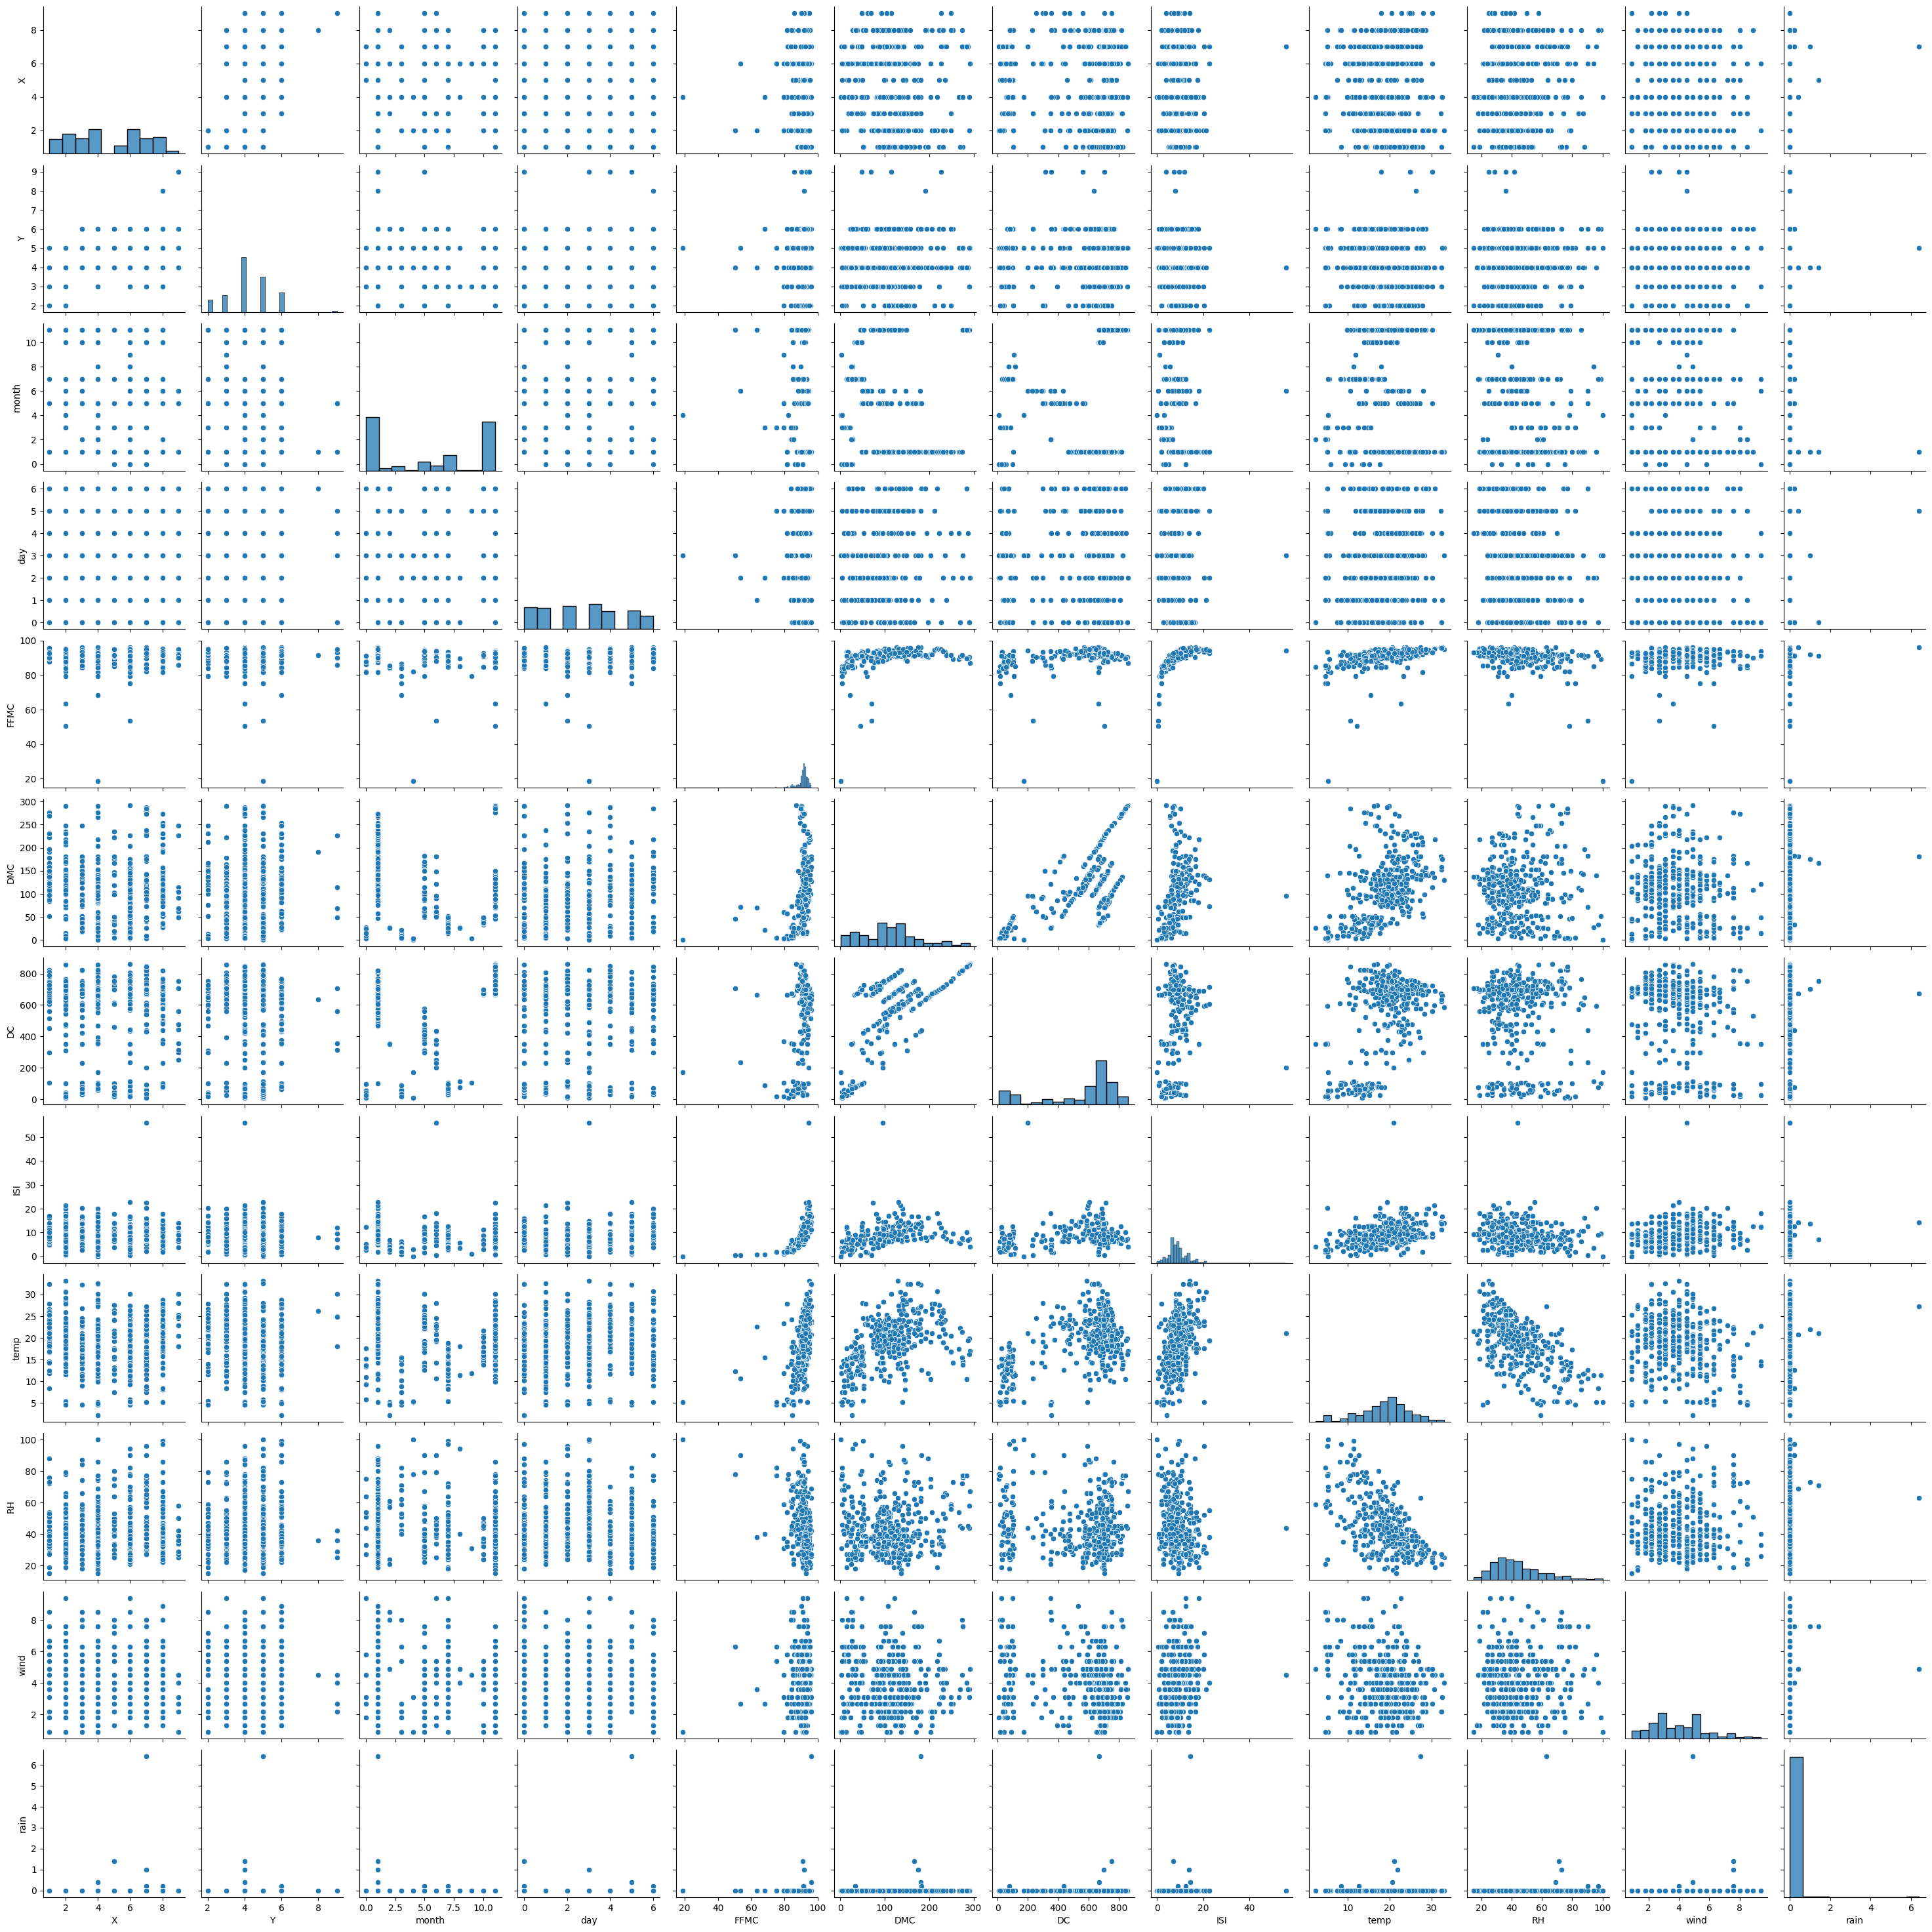

In [21]:
sns.pairplot(X_train)

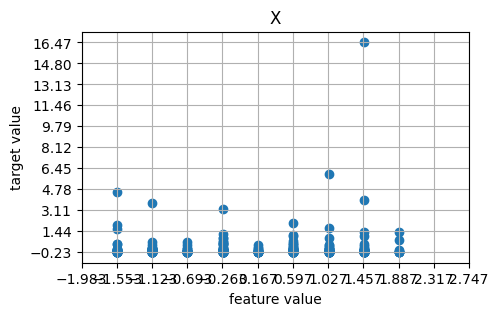

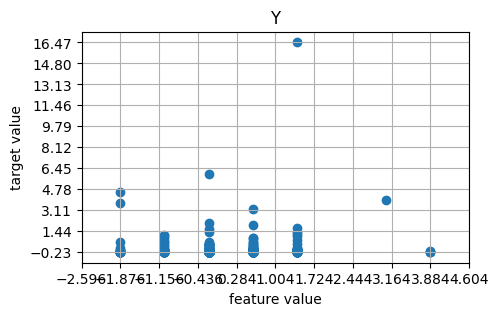

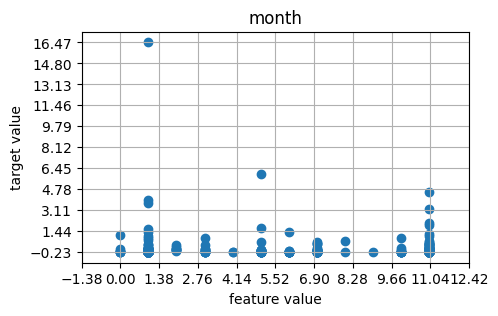

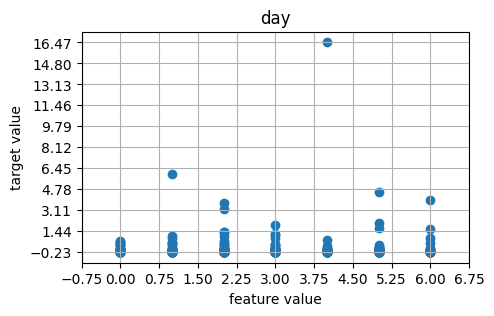

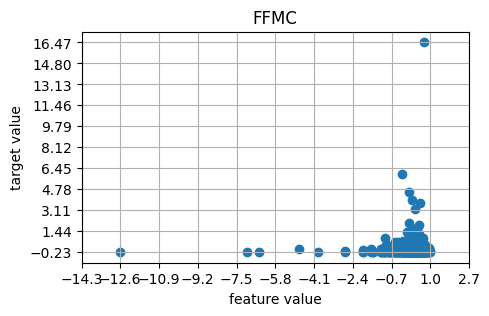

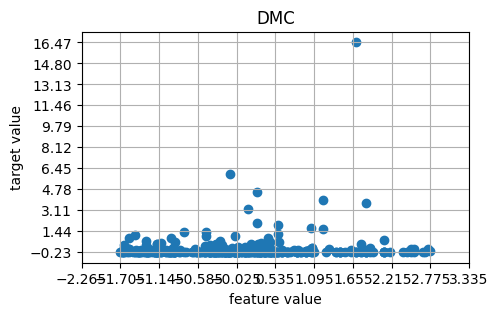

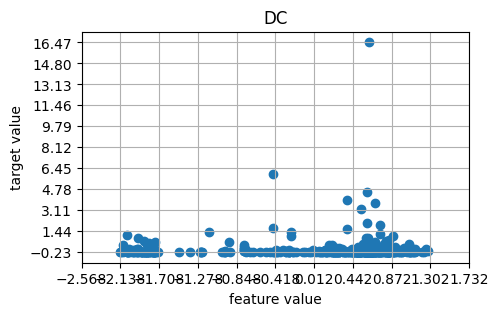

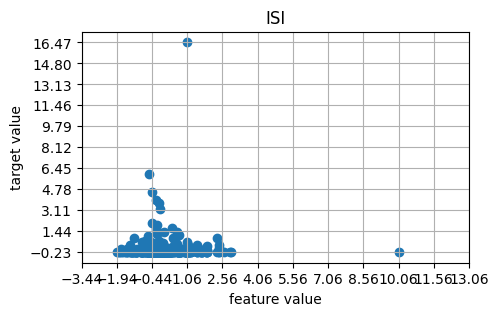

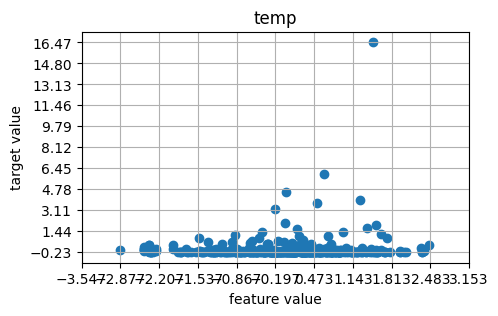

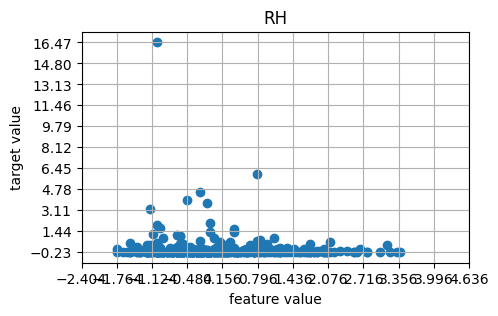

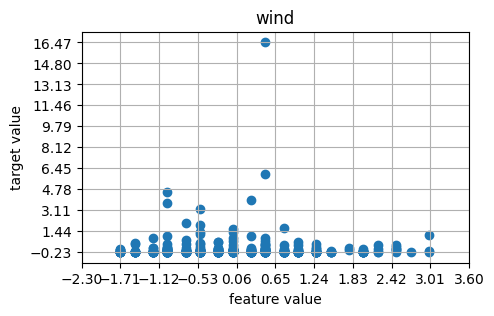

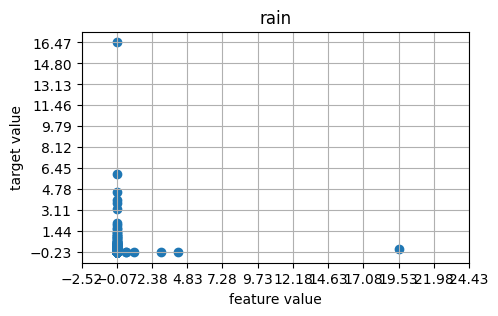

In [43]:
y_train_scaled_min = min(y_train_scaled)
y_train_scaled_max = max(y_train_scaled)
y_step = round((y_train_scaled_max - y_train_scaled_min)/10, 2)

for feature in X_train.columns:
    x_min = min(X_train_scaled[feature])
    x_max = max(X_train_scaled[feature])
    x_step = round((x_max-x_min)/8, 2)
    
    plt.figure(figsize=[5,3])
    plt.xlim(x_min, x_max)
    plt.xticks(np.arange(x_min - x_step, x_max + 2 * x_step, x_step))
    plt.yticks(np.arange(y_train_scaled_min - y_step, y_train_scaled_max + 2 * y_step, y_step))
    
    plt.grid()
    plt.title(feature)
    plt.xlabel("feature value")
    plt.ylabel("target value")

    plt.scatter(X_train_scaled[feature], y_train_scaled)
    plt.show()

Из графиков зависимости предсказываемого значения от признаков, можно сделать следующие выводы:
  - Предсказывамое значение принимает большие значения лишь при нулевом значении ``rain``, вероятно существует зависимость предсказываемого значения от признака ``rain``.

# Эксперименты для предложенных методов

## Перцептрон

In [23]:
# Параметры конструктора
MLPRegressor().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Список гиперпараметров, которые будут подбираться:
  - ``hidden_layer_sizes`` - количество и размер скрытых слоев
  - ``activation`` - функция активации
  - ``alpha`` - 'сила' L2-регуляризации
  - ``solver`` - использование классического SGD или оптимизации Adam

В качестве метрики будет использоваться ``"neg_mean_squared_error"`` (``metrics.mean_squared_error``) - cреднеквадратическая ошибка регрессионных потерь.

In [25]:
# Размер скрытого слоя
hidden_layer_dims = [50, 100, 150, 200]
# Количество скрытых слоев
hidden_layer_nums = [1, 2, 3]

# Всевозможные комбинации вида 'num слоев размера dim'. 
hidden_layer_sizes = []
for num in hidden_layer_nums:
    for dim in hidden_layer_dims:
        hidden_layer_sizes.append([dim] * num)

# Сетка параметров
perceptron_param_grid = {
  #'hidden_layer_sizes': hidden_layer_sizes, 
  #'activation': ["logistic", "tanh", "relu"],
  # alpha': [0.000001, 0.00001, 0.0001, 0.001],
  #'solver': ["sgd", "adam"]
}
perceptron_param_combinations_num = len(ParameterGrid(perceptron_param_grid))
pprint(perceptron_param_grid)

# metrics.mean_squared_error
perceptron_scoring = "neg_mean_squared_error"

{}


In [26]:
perceptron = MLPRegressor(
  max_iter=5000,
  random_state=0
)

grid_search = GridSearchCV(
  estimator=perceptron, 
  param_grid=perceptron_param_grid,
  scoring=perceptron_scoring
)

grid_search.fit(X_train_scaled, y_train)

perceptron_best = grid_search.best_estimator_
perceptron_best_params = grid_search.best_params_
perceptron_best_score = grid_search.best_score_

/Users/rustamsubkhankulov/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rustamsubkhankulov/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rustamsubkhankulov/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rustamsubkhankulov/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

In [120]:
print(f"Best score: {round(perceptron_best_score, 6)}")
print("Best parameters:")
pprint(perceptron_best_params)

Best score: -2013.404625
Best parameters:
{}


In [121]:
y_test_pred = perceptron_best.predict(X_test)
perceptron_test_score = mean_squared_error(y_test, y_test_pred)
print(f"Test score: {round(perceptron_test_score, 6)}")

Test score: 12292.438331


In [122]:
perceptron_params = grid_search.cv_results_["params"]
perceptron_scores = grid_search.cv_results_["mean_test_score"]

# Каждая комбинация параметров
for idx in range(perceptron_param_combinations_num):
    print("Parameters combination:")
    pprint(perceptron_params[idx])
    print(f"Score: {perceptron_scores[idx]}")

Parameters combination:
{}
Score: -2013.4046252113494


## Надарая-Ватсона

## SVR

# Описание полученных результатов